In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from igraph import Graph, ADJ_MAX
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from scipy.sparse import csgraph
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import louvain
import scanpy as sc

/tmp/ipykernel_1753239/3484051876.py:19: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [3]:
def load_packages(packages):
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            !pip install {package}
    print("Loading packages...")
    for package in packages:
        globals()[package] = __import__(package)

def bin_diffusion_maps(lf_mat, k_vec=[3, 5, 10, 25, 50, 100]):
    print("Cluster louvain ...")
    lk = {}
    for k in k_vec:
        knn_norm = NearestNeighbors(n_neighbors=k + 1, metric='euclidean').fit(lf_mat)
        knn_indices = knn_norm.kneighbors_graph(lf_mat).nonzero()
        knn_norm = pd.DataFrame({'from': knn_indices[0], 'to': knn_indices[1], 'weight': 1 / (1 + knn_norm.kneighbors(lf_mat)[0][:, 1:])})
        nw_norm = nx.from_pandas_edgelist(knn_norm, 'from', 'to', ['weight'])
        lc_norm = louvain.best_partition(nw_norm)
        lk[f'luv_{k}'] = LabelEncoder().fit_transform(list(lc_norm.values()))
    dk = pd.DataFrame(lk)
    return dk

In [4]:
n_sub = 2000  # minimal number of genes per cell
dims_use = 20  # PCA dimensions to use for umap

In [5]:

params = {
    'n_sub': n_sub,
    'dims_use': dims_use
}


packages = [
    "seaborn",
    "pandas",
    "numpy",
    "sklearn",
    "matplotlib",
    "umap",
    "louvain",
    "networkx",
    "scanpy"
]
load_packages(packages)




Loading packages...


In [8]:
!pip install rpy2


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
sc.pp.normalize_total(seu_sub, target_sum=1e4)
sc.pp.log1p(seu_sub)
kkmk/kfg

In [ ]:
sc.pp.highly_variable_genes(seu_sub, n_top_genes=params['n_sub'])

In [ ]:
sc.tl.pca(seu_sub, n_comps=params['dims_use'])

In [ ]:

cind1 = [gene.startswith('SCoV1') for gene in seu_sub.var_names]
cind2 = [gene.startswith('SCoV2') for gene in seu_sub.var_names]


mat = seu_sub.X.toarray()
mat_sel1 = mat[cind1, :]
mat_sel2 = mat[cind2, :]


seu_sub.obs['SCov1_Load'] = mat_sel1.sum(axis=0)
seu_sub.obs['SCov2_Load'] = mat_sel2.sum(axis=0)

In [ ]:

umap_rna = UMAP().fit_transform(sce.obsm['X_diffmap'])
seu_sub.obsm['umap_rna'] = umap_rna

In [ ]:

dm_dist_mat = pairwise_distances(sce.obsm['X_diffmap'], metric='euclidean')
dm_dpt = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=0).fit(dm_dist_mat)
dm_clust = pd.DataFrame({'virus_' + str(i): dm_dpt.labels_ for i in range(dm_dpt.n_clusters_)})

seu_sub.obs = pd.concat([seu_sub.obs, dm_clust], axis=1)

In [ ]:
# Velocity Estimation
# Runs the velocity estimation
sc.tl.velocity(seu_sub, mode='stochastic', groups='ident', num_neighbors=15)
seu_sub.obs['Velo'] = seu_sub.obsm['velocity']

# Save the resulting Seurat object
outfile = output_directory + '/Seurat_Processed.h5ad'
seu_sub.write(outfile, compression='gzip')

In [21]:
pip install rds2py

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.9 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 45.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.titlepad'] = 10

def ggplot_colors(g):
    d = 360 / g
    h = [15] + [i * d for i in range(1, g)]
    return sns.color_palette("hls", g)

# Data Input
# Reading data from CSV files
calu3 = pd.read_csv('Calu3_Table.csv')
calu3_arrows = pd.read_csv('Calu3_Arrows.csv')
calu3_corr = pd.read_csv('Calu3_Correlation.csv')



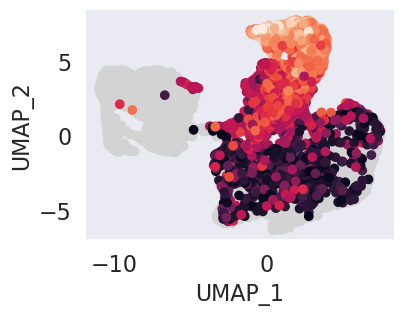

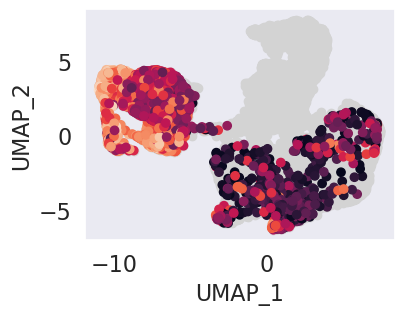

In [24]:
calu3 = pd.read_csv('Calu3_Table.csv')

# Scatter plot for SCoV1-UTR3
plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'], color='lightgray')
plt.scatter(calu3[calu3['SCoV1-UTR3'] > 0]['UMAPrna_1'], calu3[calu3['SCoV1-UTR3'] > 0]['UMAPrna_2'], c=calu3[calu3['SCoV1-UTR3'] > 0]['SCoV1-UTR3'])
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.show()

# Scatter plot for SCoV2-UTR3
plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'], color='lightgray')
plt.scatter(calu3[calu3['SCoV2-UTR3'] > 0]['UMAPrna_1'], calu3[calu3['SCoV2-UTR3'] > 0]['UMAPrna_2'], c=calu3[calu3['SCoV2-UTR3'] > 0]['SCoV2-UTR3'])
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.show()




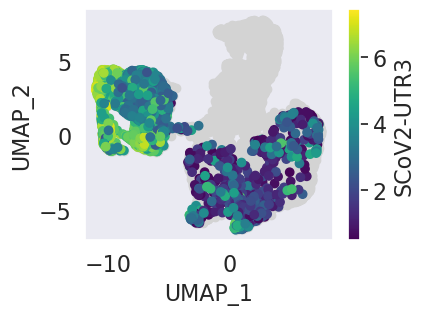

In [25]:
# Scatter plot for SCoV2-UTR3
plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'], color='lightgray')
plt.scatter(calu3[calu3['SCoV2-UTR3'] > 0]['UMAPrna_1'], calu3[calu3['SCoV2-UTR3'] > 0]['UMAPrna_2'], c=calu3[calu3['SCoV2-UTR3'] > 0]['SCoV2-UTR3'], cmap='viridis')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.colorbar(label='SCoV2-UTR3')
plt.show()


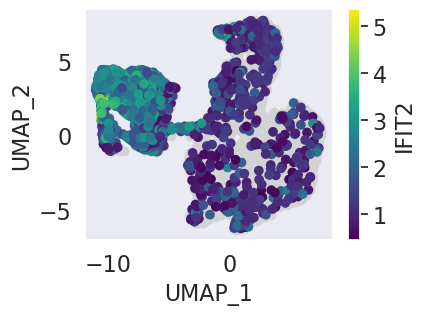

In [26]:
calu3 = calu3.rename(columns={'exon_IFIT2': 'IFIT2'})
plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'], color='lightgray')
plt.scatter(calu3[calu3['IFIT2'] > 0]['UMAPrna_1'], calu3[calu3['IFIT2'] > 0]['UMAPrna_2'], c=calu3[calu3['IFIT2'] > 0]['IFIT2'], cmap='viridis')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.colorbar(label='IFIT2')
plt.show()

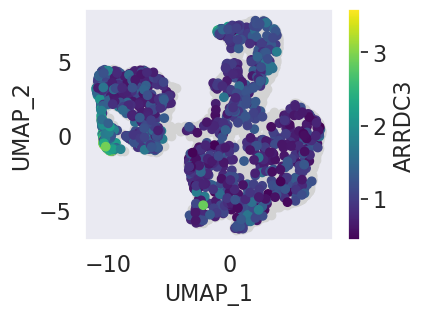

In [27]:
calu3 = calu3.rename(columns={'exon_ARRDC3': 'ARRDC3'})
plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'], color='lightgray')
plt.scatter(calu3[calu3['ARRDC3'] > 0]['UMAPrna_1'], calu3[calu3['ARRDC3'] > 0]['UMAPrna_2'], c=calu3[calu3['ARRDC3'] > 0]['ARRDC3'], cmap='viridis')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.colorbar(label='ARRDC3')
plt.show()

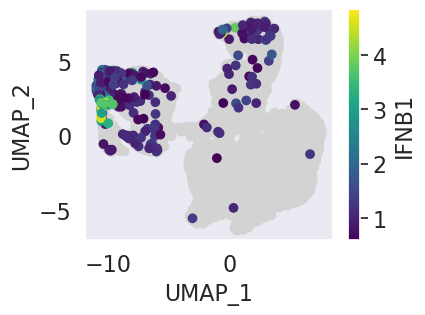

In [28]:
calu3 = calu3.rename(columns={'exon_IFNB1': 'IFNB1'})
plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'], color='lightgray')
plt.scatter(calu3[calu3['IFNB1'] > 0]['UMAPrna_1'], calu3[calu3['IFNB1'] > 0]['UMAPrna_2'], c=calu3[calu3['IFNB1'] > 0]['IFNB1'], cmap='viridis')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.colorbar(label='IFNB1')
plt.show()

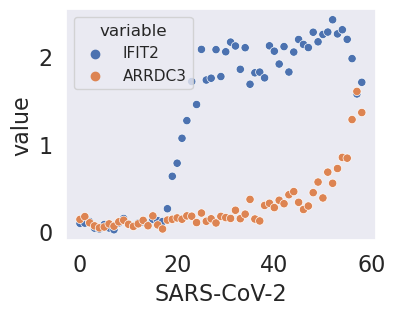

In [29]:

calu3_s2 = calu3[calu3['type'] == 'S2']
calu3_s2 = calu3_s2.rename(columns={'exon_IFIT2': 'IFIT2', 'exon_ARRDC3': 'ARRDC3'})

calu3_s2['index'] = (
    calu3_s2
    .sort_values('SCov2_Load')
    .groupby('type')
    .cumcount()
    .floordiv(50)
)

calu3_s2_means = (
    calu3_s2
    .groupby('index')
    .agg({'IFIT2': 'mean', 'ARRDC3': 'mean'})
    .reset_index()
)
calu3_s2_melted = pd.melt(calu3_s2_means, id_vars='index', var_name='variable', value_name='value')

sns.scatterplot(data=calu3_s2_melted, x='index', y='value', hue='variable')
plt.xlabel('SARS-CoV-2')
plt.show()


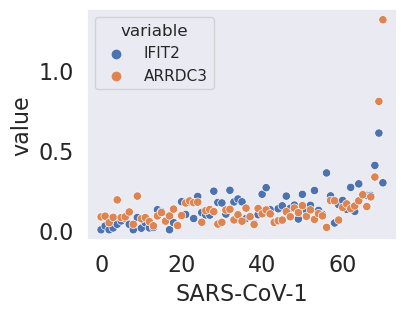

In [32]:

calu3_s1 = calu3[calu3['type'] == 'S1']
calu3_s1 = calu3_s1.rename(columns={'exon_IFIT2': 'IFIT2', 'exon_ARRDC3': 'ARRDC3'})

calu3_s1['index'] = (
    calu3_s1
    .sort_values('SCov1_Load')
    .groupby('type')
    .cumcount()
    .floordiv(50)
)

calu3_s1_means = (
    calu3_s1
    .groupby('index')
    .agg({'IFIT2': 'mean', 'ARRDC3': 'mean'})
    .reset_index()
)

calu3_s1_melted = pd.melt(calu3_s1_means, id_vars='index', var_name='variable', value_name='value')

# Scatter plot with facets
sns.scatterplot(data=calu3_s1_melted, x='index', y='value', hue='variable')
plt.xlabel('SARS-CoV-1')
plt.show()


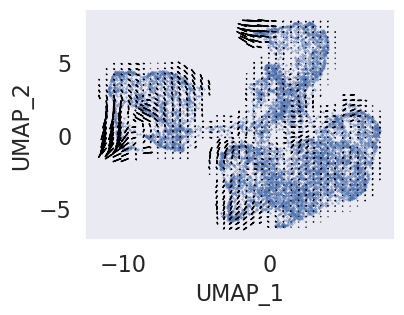

In [35]:
calu3 = pd.read_csv('Calu3_Table.csv')
calu3_arrows = pd.read_csv('Calu3_Arrows.csv')

# Convert 'time' to a factor
calu3['time'] = calu3['time'].astype('category')

# Scatter plot with arrows
plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'],  s=0.1)
for _, arrow_data in calu3_arrows.iterrows():
    plt.arrow(arrow_data['x0'], arrow_data['y0'], arrow_data['x1'] - arrow_data['x0'], arrow_data['y1'] - arrow_data['y0'],
              length_includes_head=True, head_width=0.01, head_length=0.01, color='black')

plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.show()


/sc-software/conda_envs/envs/computelab/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


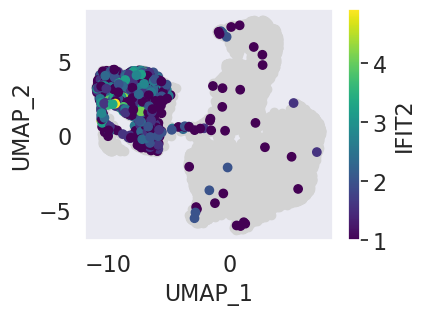

In [36]:

calu3['IFIT2'] = np.log2(calu3['intron_IFIT2'])
plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'], color='lightgray')
plt.scatter(calu3[calu3['IFIT2'] > 0]['UMAPrna_1'], calu3[calu3['IFIT2'] > 0]['UMAPrna_2'], c=calu3[calu3['IFIT2'] > 0]['IFIT2'], cmap='viridis')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.colorbar(label='IFIT2')
plt.show()


/sc-software/conda_envs/envs/computelab/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


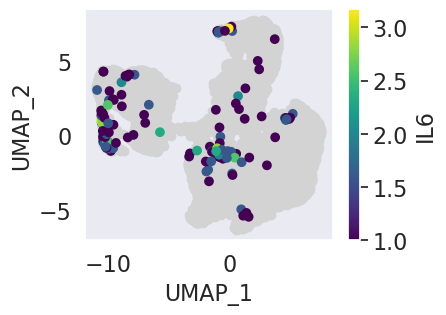

In [37]:

calu3['IL6'] = np.log2(calu3['intron_IL6'])
plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'], color='lightgray')
plt.scatter(calu3[calu3['IL6'] > 0]['UMAPrna_1'], calu3[calu3['IL6'] > 0]['UMAPrna_2'], c=calu3[calu3['IL6'] > 0]['IL6'], cmap='viridis')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.colorbar(label='IL6')
plt.show()


/sc-software/conda_envs/envs/computelab/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


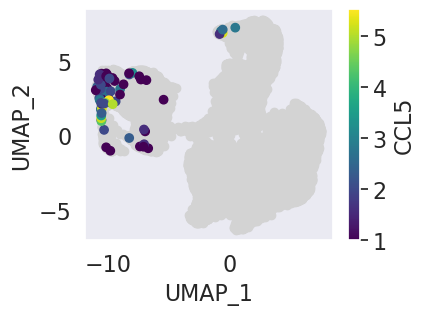

In [38]:
calu3['CCL5'] = np.log2(calu3['intron_CCL5'])

plt.scatter(calu3['UMAPrna_1'], calu3['UMAPrna_2'], color='lightgray')
plt.scatter(calu3[calu3['CCL5'] > 0]['UMAPrna_1'], calu3[calu3['CCL5'] > 0]['UMAPrna_2'], c=calu3[calu3['CCL5'] > 0]['CCL5'], cmap='viridis')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.colorbar(label='CCL5')
plt.show()


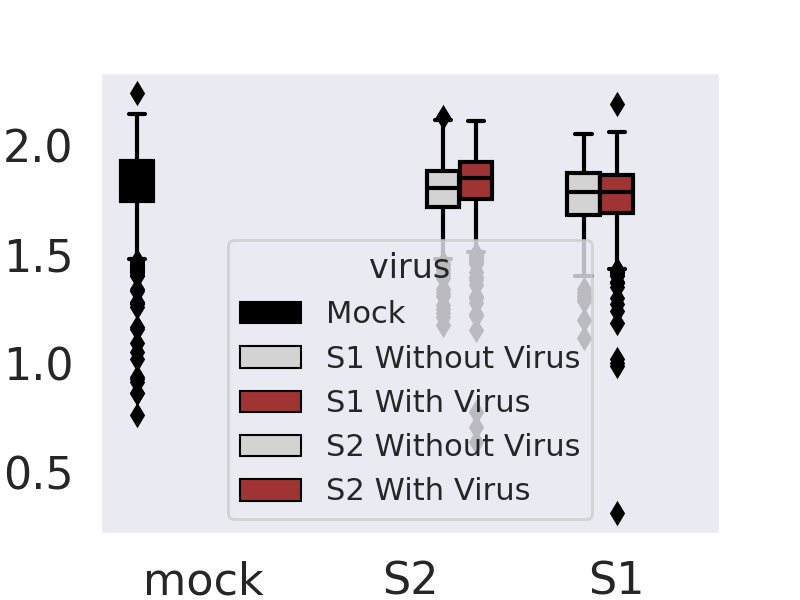

In [51]:
calu3 = pd.read_csv('Calu3_Table.csv')

calu3_4h = calu3[calu3['time'] == '4h'].copy()
calu3_4h['HSP90AA1'] = np.log2(calu3_4h['exon_HSP90AA1'])
calu3_4h['sample'] = calu3_4h['type']
calu3_4h['virus'] = np.select(
    [
        (calu3_4h['SCov2_Load'] > 0) & (calu3_4h['sample'] == 'S2'),
        (calu3_4h['SCov2_Load'] == 0) & (calu3_4h['sample'] == 'S2'),
        (calu3_4h['SCov1_Load'] > 0) & (calu3_4h['sample'] == 'S1'),
        (calu3_4h['SCov1_Load'] == 0) & (calu3_4h['sample'] == 'S1'),
    ],
    [
        'S2 With Virus',
        'S2 Without Virus',
        'S1 With Virus',
        'S1 Without Virus',
    ],
    default='Mock'
)

# Set order for 'virus' factor
virus_order = ['Mock', 'S1 Without Virus', 'S1 With Virus', 'S2 Without Virus', 'S2 With Virus']
calu3_4h['virus'] = pd.Categorical(calu3_4h['virus'], categories=virus_order, ordered=True)
sns.boxplot(x='sample', y='HSP90AA1', hue='virus', data=calu3_4h, palette=['black', 'lightgray', 'firebrick', 'lightgray', 'firebrick'])
plt.xlabel('sample')
plt.ylabel('HSP90AA1 mRNA')
plt.show()



/home/likh10/.local/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


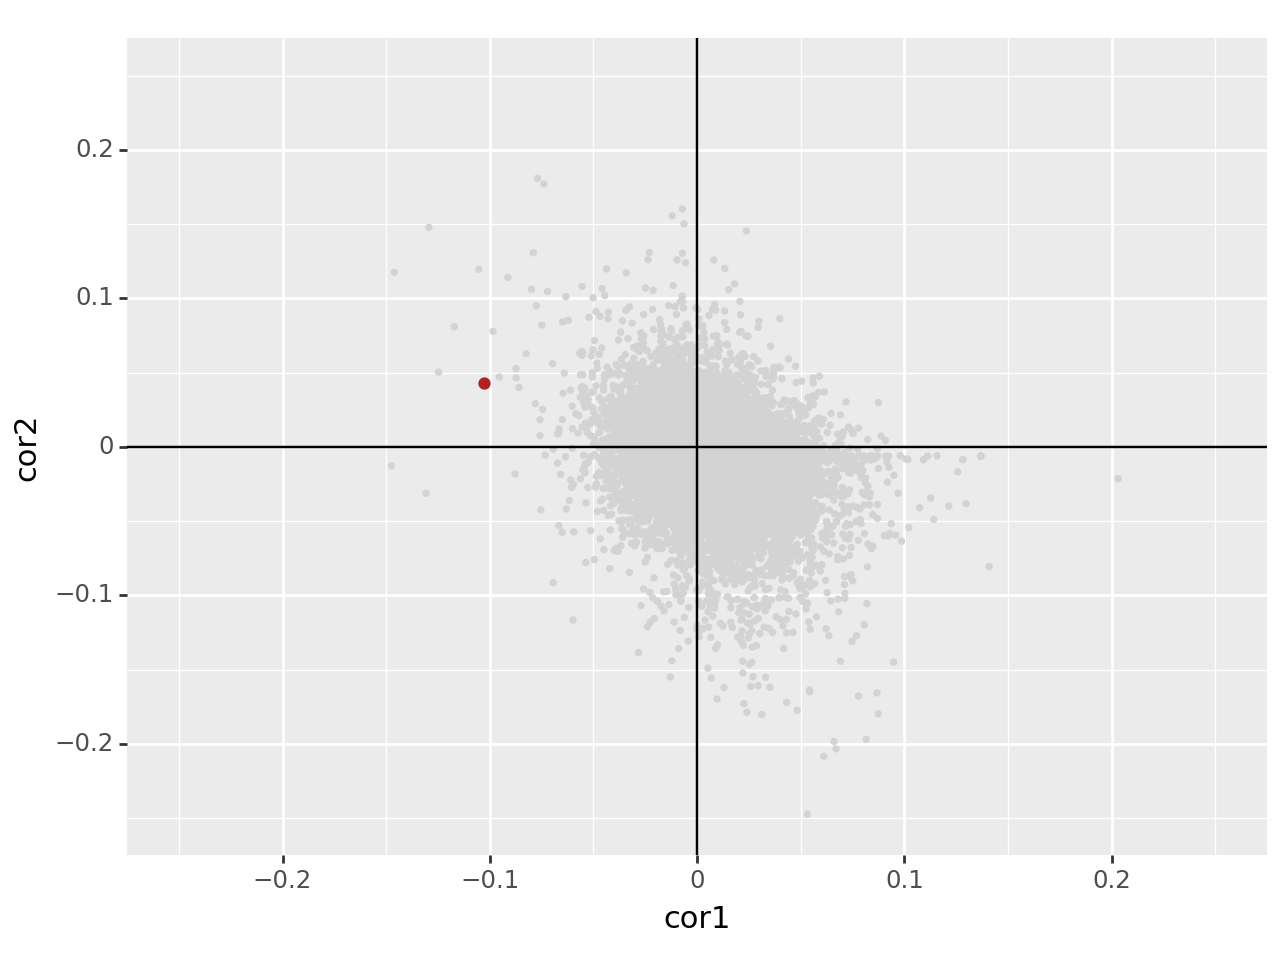

<Figure Size: (640 x 480)>

In [54]:
from plotnine import ggplot, aes, geom_point, theme, element_text, element_blank
calu3_corr = pd.read_csv('Calu3_Correlation.csv')
calu3_corr_filtered = calu3_corr[~calu3_corr['gene_id'].str.contains('SCoV')]
(
    ggplot(calu3_corr_filtered, aes('cor1', 'cor2')) +
    geom_point(color='lightgray', size=0.5) +
    geom_point(data=calu3_corr_filtered[calu3_corr_filtered['gene_id'] == 'HSP90AA1'], color='firebrick') +
    theme() +
    theme(axis_text_x=element_text(margin=dict(b=12)), axis_text_y=element_text(margin=dict(l=12))) +
    xlim(-0.25, 0.25) +
    ylim(-0.25, 0.25) +
    geom_hline(yintercept=0) +
    geom_vline(xintercept=0),

)

